In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.classes.action_tests import ActionTest
from triple_agent.classes.outcomes import WinType
from triple_agent.classes.missions import Missions
from triple_agent.reports.specific.mission_choices import mission_choices
#from triple_agent.reports.specific.mission_completes import mission_completion, mission_completion_query
from triple_agent.reports.specific.action_tests import action_test_percentages, diff_action_test_percentages
from triple_agent.reports.specific.fingerprints import attempted_fingerprint_sources
from triple_agent.reports.specific.banana_breads import all_banana_bread_percentages, first_banana_bread_percentages, banana_split
from triple_agent.reports.specific.character_selection import (spy_selection,
                                                      st_selection,
                                                      amba_selection,
                                                      double_agent_selection,
                                                      determine_character_in_role)
from triple_agent.reports.specific.bug import bug_attempt_timings, bug_success_rate
from triple_agent.reports.specific.time_adds import time_add_times, time_add_times_per_game
from triple_agent.reports.specific.game_outcomes import game_outcomes
from triple_agent.reports.specific.seduce import first_flirt_timing
from triple_agent.constants.events import SCL5_PICK_MODES, SCL5_VENUE_MODES, SCL5_DROPPED_PLAYERS
from triple_agent.reports.specific.stop_talks import stop_talk_in_game_percentage
from triple_agent.reports.specific.microfilm import at_or_direct_mf
from triple_agent.classes.roles import Roles
from triple_agent.reports.generation.common_sort_functions import sort_by_spy_wins
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties

In [4]:
division = 'Copper'

In [5]:
div_replays = get_parsed_replays(
    lambda g: g.division == division \
    and g.event == 'SCL5' \
    and g.spy not in SCL5_DROPPED_PLAYERS \
    and g.sniper not in SCL5_DROPPED_PLAYERS)

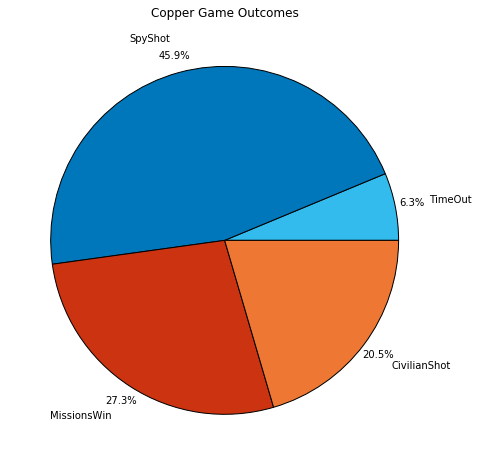

In [6]:
_=game_outcomes(div_replays, axis_properties=AxisProperties(title=f"{division} Game Outcomes"))

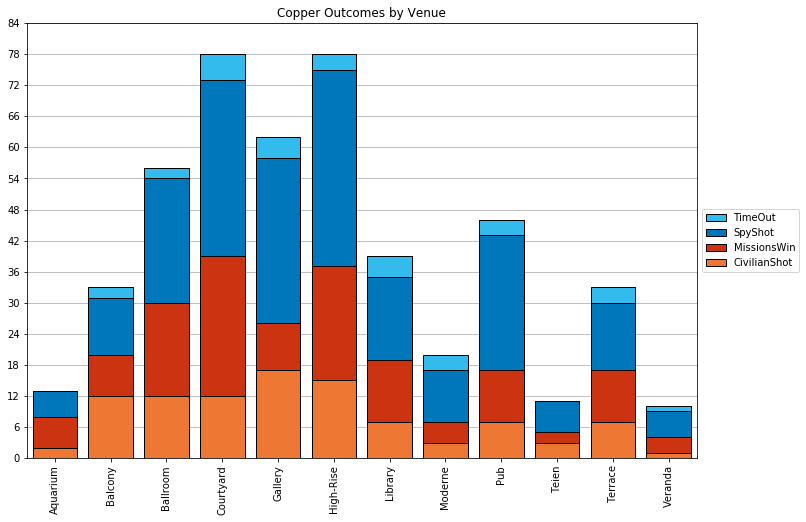

In [7]:
_=game_outcomes(
    div_replays,
    DataQueryProperties(groupby=lambda g: g.venue),
    AxisProperties(title=f"{division} Outcomes by Venue")
)

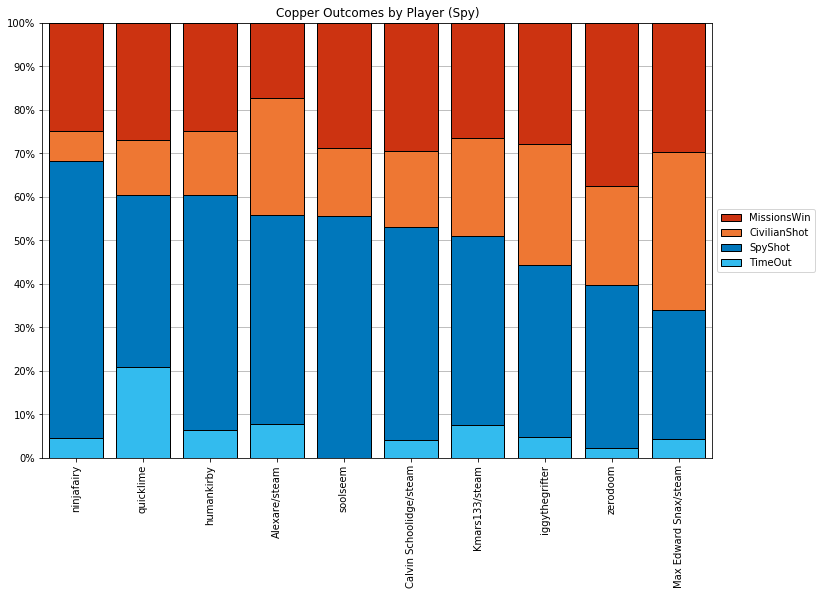

In [8]:
_=game_outcomes(
    div_replays,
    DataQueryProperties(
        groupby=lambda g: g.spy,
        percent_normalized_data=True,
        primary_order=[WinType.MissionsWin, WinType.CivilianShot, WinType.SpyShot, WinType.TimeOut],
        secondary_order=sort_by_spy_wins
    ),
    AxisProperties(title=f"{division} Outcomes by Player (Spy)")
)

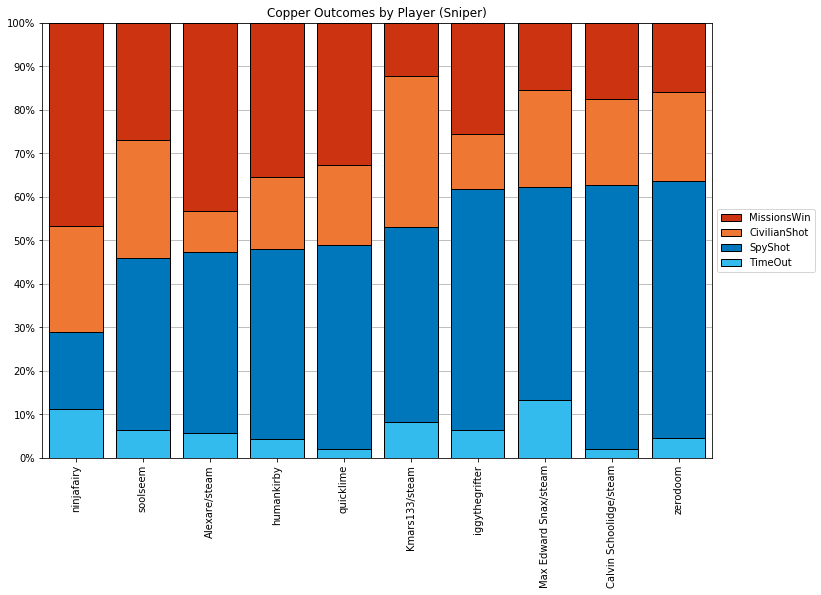

In [9]:
_=game_outcomes(
    div_replays,
    DataQueryProperties(
        groupby=lambda g: g.sniper,
        percent_normalized_data=True,
        primary_order=[WinType.MissionsWin, WinType.CivilianShot, WinType.SpyShot, WinType.TimeOut],
        secondary_order=sort_by_spy_wins,
        reverse_secondary_order=True
    ),
    AxisProperties(title=f"{division} Outcomes by Player (Sniper)")
)

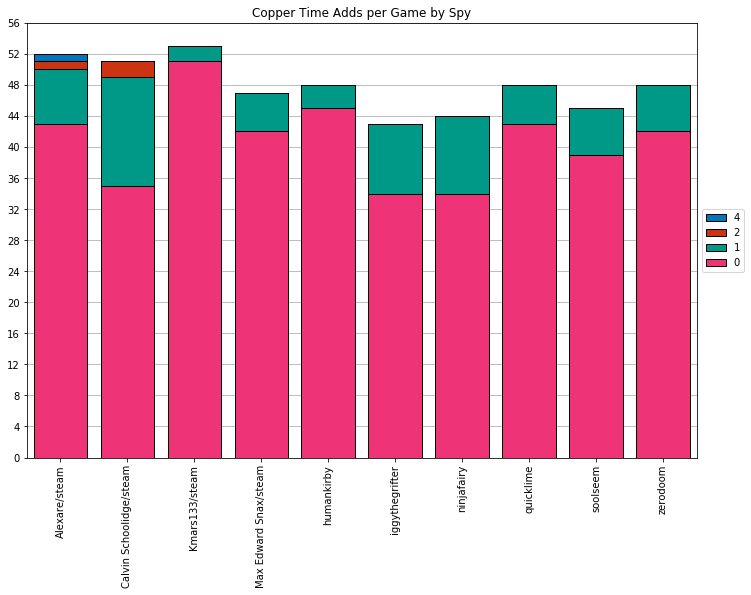

In [10]:
_=time_add_times_per_game(
    div_replays,
    DataQueryProperties(
        groupby=lambda g: g.spy,
    ),
    AxisProperties(title=f"{division} Time Adds per Game by Spy")
)